# HOMEWORK: k-Nearest Neighbors

In [182]:
import os

import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 100)

from sklearn import preprocessing, neighbors, grid_search, cross_validation
from sklearn import model_selection


import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [70]:
df = pd.read_csv('dataset-boston.csv')

In [73]:

df.head()
df2= df.copy()
df2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


The Boston dataset concerns itself with housing values in suburbs of Boston.  A description of the dataset is as follows:

- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sqft
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River binary/dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate (per ten thousands of dollars)
- PTRATIO: pupil-teacher ratio by town
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT: % lower status of the population
- MEDV: Median value of owner-occupied homes (in thousands of dollars)

## Question 1.  
+ Let's first categorize `MEDV` to 4 groups: Bottom 20% as Level 1, next 30% as Level 2, next 30% categorized as Level 3, and the top 20% as Level 4.  
+ Please create a new variable `MEDV_Category` that stores the level number
+ Remember the quantile function
+ Remember how to segment your pandas data frame

In [82]:

df.loc["MEDV_Category"] = "0"

df.loc[df['MEDV']<=df['MEDV'].quantile(0.2), 'MEDV_Category'] = "Level 1"
df.loc[(df['MEDV']>df['MEDV'].quantile(0.2))&(df['MEDV']<=df['MEDV'].quantile(0.5)), 'MEDV_Category'] = "Level 2"
df.loc[(df['MEDV']>df['MEDV'].quantile(0.5))&(df['MEDV']<=df['MEDV'].quantile(0.8)), 'MEDV_Category'] = "Level 3"
df.loc[df['MEDV']>df['MEDV'].quantile(0.8), 'MEDV_Category'] = "Level 4"

df[['MEDV','MEDV_Category']].head()

,MEDV,MEDV_Category
0,24,Level 3
1,21.6,Level 3
2,34.7,Level 4
3,33.4,Level 4
4,36.2,Level 4


### Our goal is to predict `MEDV_Category` based on `RM`, `PTRATIO`, and `LSTAT`

## Question 2.  

+ First normalize `RM`, `PTRATIO`, and `LSTAT`.  
+ By normalizing, we mean to scale each variable between 0 and 1 with the lowest value as 0 and the highest value as 1

+ Check out the documentation for MinMaxScaler()

In [107]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[['RM', 'PTRATIO','LSTAT']] = scaler.fit_transform(df[['RM', 'PTRATIO','LSTAT']])

df2= df[['RM', 'PTRATIO','LSTAT','MEDV_Category']]
df2_features=df2[['RM', 'PTRATIO','LSTAT']].values
df2_target=df2['MEDV_Category'].values


## Question 3.  

+ Run a k-NN classifier with 5 nearest neighbors and report your misclassification error; set weights to uniform
+ Calculate your misclassification error on the training set

In [233]:
from sklearn.cross_validation import train_test_split

X = df2_features 
y = df2_target

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [316]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors =5

knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights='uniform')
# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

#miscalculation
print knn.score(X_test, y_test )

print knn.score(X_train, y_train )



0.645320197044
0.796052631579


## Question 4. 
+ Is this error reliable? 
+ What could we do to make it better?

## Question 5.  
+ Now use 10-fold cross-validation to choose the most efficient `k`

In [321]:
myList = list(range(0,100))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

cv_scores = []

# perform 5-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

min(MSE)
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)



The optimal number of neighbors is 17.


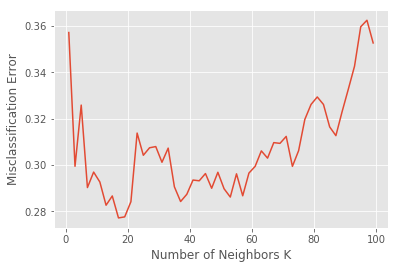

In [322]:
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [158]:
print gs.best_params_


{'n_neighbors': 16, 'metric': 'minkowski', 'weights': 'distance'}


In [159]:
print gs.best_estimator_


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=16, p=2,
           weights='distance')


In [326]:
from sklearn import grid_search, cross_validation
import matplotlib.pyplot as plt


k = range(1, 200)
params = {'n_neighbors':k, 'weights':['uniform',"distance"], 
         'metric':['minkowski']}

kf = cross_validation.KFold(len(df2), n_folds = 10)
gs_10 = grid_search.GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=params,
    cv=kf,
)
gs_10.fit(df2_features,df2_target)
gs_10.grid_scores_


[mean: 0.61144, std: 0.09937, params: {'n_neighbors': 1, 'metric': 'minkowski', 'weights': 'uniform'},
 mean: 0.61144, std: 0.09937, params: {'n_neighbors': 1, 'metric': 'minkowski', 'weights': 'distance'},
 mean: 0.62525, std: 0.07740, params: {'n_neighbors': 2, 'metric': 'minkowski', 'weights': 'uniform'},
 mean: 0.61144, std: 0.09937, params: {'n_neighbors': 2, 'metric': 'minkowski', 'weights': 'distance'},
 mean: 0.63314, std: 0.10106, params: {'n_neighbors': 3, 'metric': 'minkowski', 'weights': 'uniform'},
 mean: 0.63511, std: 0.11089, params: {'n_neighbors': 3, 'metric': 'minkowski', 'weights': 'distance'},
 mean: 0.67653, std: 0.10559, params: {'n_neighbors': 4, 'metric': 'minkowski', 'weights': 'uniform'},
 mean: 0.64103, std: 0.11757, params: {'n_neighbors': 4, 'metric': 'minkowski', 'weights': 'distance'},
 mean: 0.67850, std: 0.08791, params: {'n_neighbors': 5, 'metric': 'minkowski', 'weights': 'uniform'},
 mean: 0.66864, std: 0.10033, params: {'n_neighbors': 5, 'metric': 'm

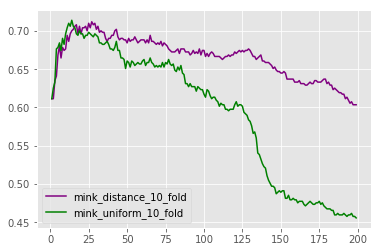

In [327]:
mink_dist_10, = plt.plot(k,[s[1] for s in  gs_10.grid_scores_[1::2][0:len(gs_10.grid_scores_[1::2])]], color='purple', label='mink_distance_10_fold')
mink_uni_10, = plt.plot(k,[s[1] for s in  gs_10.grid_scores_[::2][0:len(gs_10.grid_scores_[::2])]], color='green', label = 'mink_uniform_10_fold')
plt.legend(handles=[mink_dist_10, mink_uni_10])

## Question 6.  

+ Explain your findings
+ What were your best parameters?
+ What was the best k?
+ What was the best model?

Answer: 



## Question 7.  

+ Train your model with the optimal `k` you found above 
+ (don't worry if it changes from time to time - if that is the case use the one that is usually the best)

In [338]:
print df2.head(3)
print df2_features[:3,:1]

         RM   PTRATIO     LSTAT MEDV_Category
0  0.748861  0.695455  0.131156       Level 3
1  0.731321  0.809091  0.240716       Level 3
2  0.818337  0.809091  0.106136       Level 4
[[0.748861047835991]
 [0.7313211845102506]
 [0.8183371298405467]]


In [365]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors =10

knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights='uniform')
# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict([2,19,3.5])

pred

#pred = knn.predict(df2_features[:])

#df2_features
#df[['RM', 'PTRATIO','LSTAT']] = scaler.fit_transform(df[['RM', 'PTRATIO','LSTAT']])

#df2= df[['RM', 'PTRATIO','LSTAT','MEDV_Category']]
#df2_features=df2[['RM', 'PTRATIO','LSTAT']].values
#df2_target=df2['MEDV_Category'].values

#miscalculation
#print knn.score(X_test, y_test )

#print knn.score(X_train, y_train )


/Users/matanefron/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array(['Level 1'], dtype=object)

## Question 8.  

+ After training your model with that `k`, 
+ use it to *predict* the class of a neighborhood with `RM = 2`, `PRATIO = 19`, and `LSTAT = 3.5`
+ If you are confused, check out the sklearn documentation for KNN

In [ ]:
# TODO

Answer: TODO